# Horror movies attributes exploratory data analysis

## Introduction

The objective of the following analysis is to explore the correlations between the different attributes associated with each movie in the "horror movies" dataset and their revenue. This to find out which attributes have the highest impact on films revenue. For example, if those films with the highest budget tend to have a higher revenue or if films with the best ratings are the most successful at the box office.

## Analysis

### Libraries

Libraries needed to carry out the exploratory data analysis.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Data summary

The purpose of this obataining the data summary is to get an overview of the columns, the data types contained in each column, and the number of NULL values present in each of them. This to evaluate if it is necessary to clean the data set or if we can drop columns not needed for our analysis. Furthermore, summary statistics are calculated to get a glimpse of the data set.

In [2]:
horror_movies <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-01/horror_movies.csv")

Rows: 32540 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): original_title, title, original_language, overview, tagline, post...
dbl   (8): id, popularity, vote_count, vote_average, budget, revenue, runtim...
lgl   (1): adult
date  (1): release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table 1.1: Horror movies dataset structure.

In [3]:
data_structure <- str(horror_movies)
data_structure

spc_tbl_ [32,540 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id               : num [1:32540] 760161 760741 882598 756999 772450 ...
 $ original_title   : chr [1:32540] "Orphan: First Kill" "Beast" "Smile" "The Black Phone" ...
 $ title            : chr [1:32540] "Orphan: First Kill" "Beast" "Smile" "The Black Phone" ...
 $ original_language: chr [1:32540] "en" "en" "en" "en" ...
 $ overview         : chr [1:32540] "After escaping from an Estonian psychiatric facility, Leena Klammer travels to America by impersonating Esther,"| __truncated__ "A recently widowed man and his two teenage daughters travel to a game reserve in South Africa. However, their j"| __truncated__ "After witnessing a bizarre, traumatic incident involving a patient, Dr. Rose Cotter starts experiencing frighte"| __truncated__ "Finney Blake, a shy but clever 13-year-old boy, is abducted by a sadistic killer and trapped in a soundproof ba"| __truncated__ ...
 $ tagline          : chr [1:32540] "There's always been

NULL

Table 1.2: Horror movies dataset summary statistics.

In [4]:
summary_stat <- summary(horror_movies)
summary_stat

       id          original_title        title           original_language 
 Min.   :     17   Length:32540       Length:32540       Length:32540      
 1st Qu.: 146495   Class :character   Class :character   Class :character  
 Median : 426521   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 445911                                                           
 3rd Qu.: 707534                                                           
 Max.   :1033095                                                           
                                                                           
   overview           tagline           release_date        poster_path       
 Length:32540       Length:32540       Min.   :1950-01-01   Length:32540      
 Class :character   Class :character   1st Qu.:2000-10-20   Class :character  
 Mode  :character   Mode  :character   Median :2012-12-09   Mode  :character  
                                       Mean   :2007-02-18                   

From Table 1.1, we can remove `poster_path` and `backdrop_path` columns, these two contain paths not relevant. Furthermore, `tagline` and `overview` since we are not doing any text mining. 

In addition, from Table 1.2 we can observe that half of the movies have a vote count less or equal to two, to explore vote average correlation, we will use those movies that got at least 10 votes.


In [5]:
drop_cols <- c('poster_path', 'backdrop_path', 'tagline', 'overview')
horror_movies <- horror_movies[ , !(names(horror_movies) %in% drop_cols)] |> filter(vote_count >= 10) 

### Pairs Matrix

Of all the attributes in the data set, there are 3 that could have a greater correlation with `revenue`, these are `runtime`, `vote_average` and `budget`, the following pairs matrix gives us a glimpse of those correlations. 

Rows: 8,477
Columns: 16
$ id                <dbl> 760161, 760741, 882598, 756999, 772450, 717728, 7625…
$ original_title    <chr> "Orphan: First Kill", "Beast", "Smile", "The Black P…
$ title             <chr> "Orphan: First Kill", "Beast", "Smile", "The Black P…
$ original_language <chr> "en", "en", "en", "en", "es", "en", "en", "en", "en"…
$ release_date      <date> 2022-07-27, 2022-08-11, 2022-09-23, 2022-06-22, 202…
$ popularity        <dbl> 5088.584, 2172.338, 1863.628, 1071.398, 1020.995, 82…
$ vote_count        <dbl> 902, 584, 114, 2736, 83, 125, 1684, 73, 1035, 637, 1…
$ vote_average      <dbl> 6.9, 7.1, 6.8, 7.9, 7.0, 5.8, 7.0, 6.5, 6.8, 7.3, 6.…
$ budget            <dbl> 0, 0, 17000000, 18800000, 0, 20000000, 68000000, 0, …
$ revenue           <dbl> 9572765, 56000000, 45000000, 161000000, 0, 2892594, …
$ runtime           <dbl> 99, 93, 115, 103, 0, 88, 130, 90, 106, 98, 89, 97, 9…
$ status            <chr> "Released", "Released", "Released", "Released", "Rel…
$ adult         

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



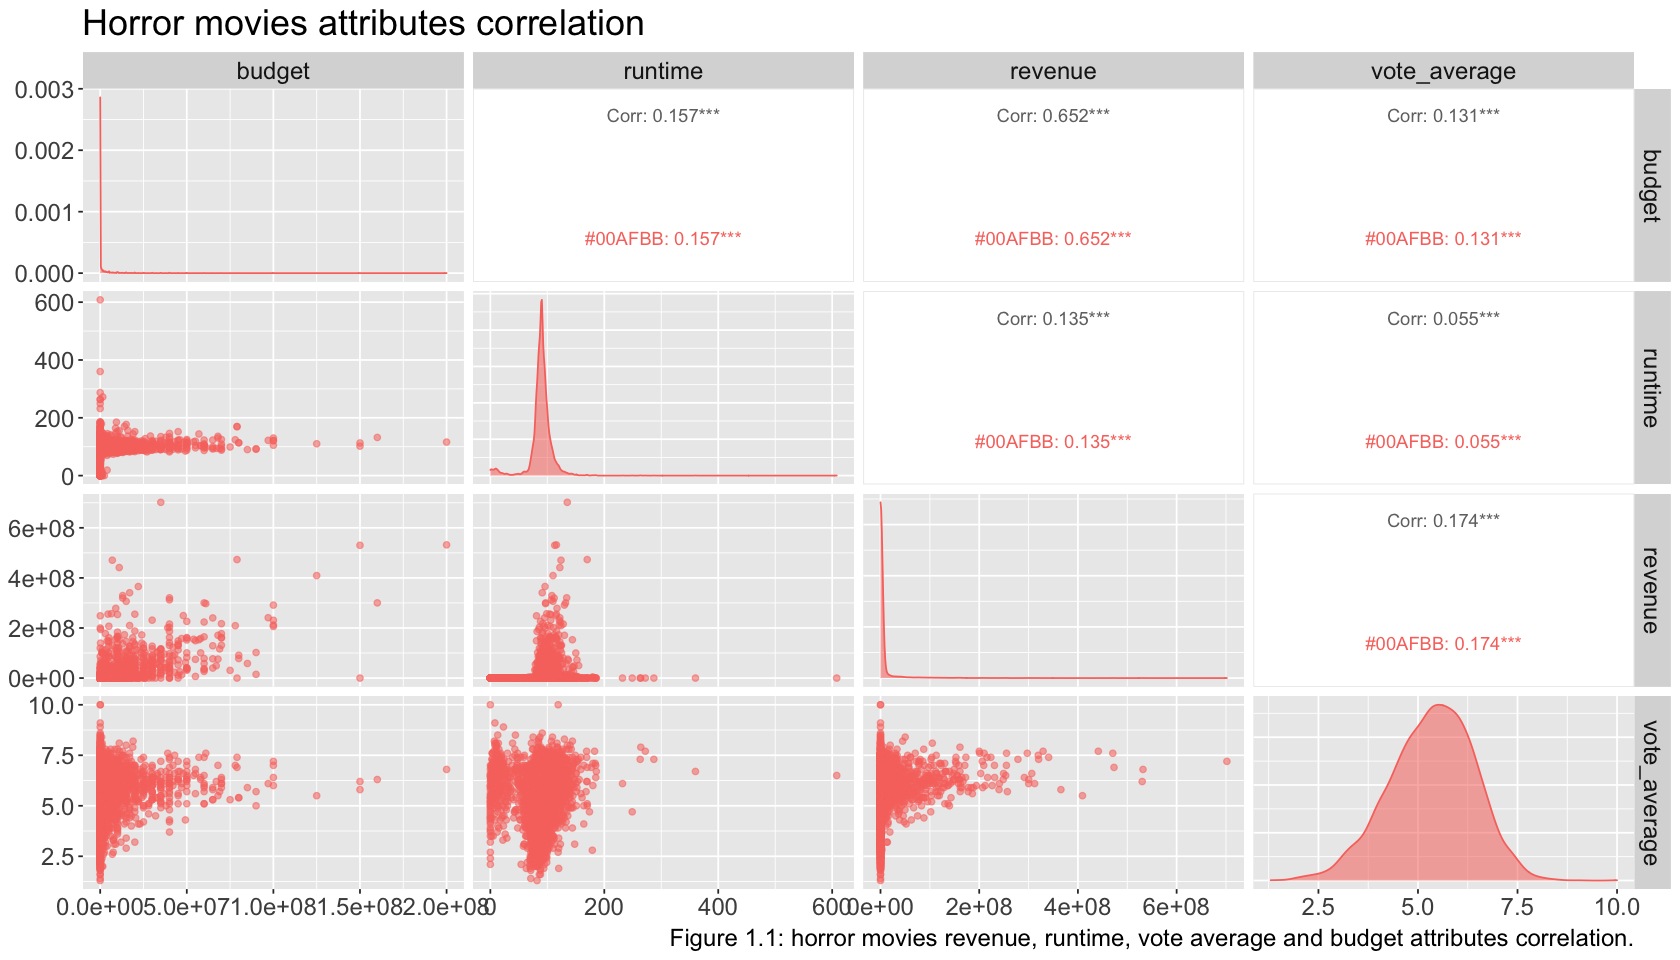

In [6]:
options(repr.plot.width = 14, repr.plot.height = 8)
data_movie <- glimpse(horror_movies) |>
    select(budget, runtime, revenue, vote_average) |> 
    drop_na()

pairs <- GGally::ggpairs(data_movie, aes(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB"), progress = FALSE) +
    ggtitle('Horror movies attributes correlation') + 
    labs(caption = "Figure 1.1: horror movies revenue, runtime, vote average and budget attributes correlation.") + theme(text =  element_text(size = 18))

# Show the plot
pairs

From Figure 1.1 we can observe that the attributes with the highest correlation with revenue are budget and vote average, the following charts will explore this attributes in detail. 

### Correlation exploration

Warning message:
“`label_number_si()` was deprecated in scales 1.2.0.
ℹ Please use the `scale_cut` argument of `label_number()` instead.”


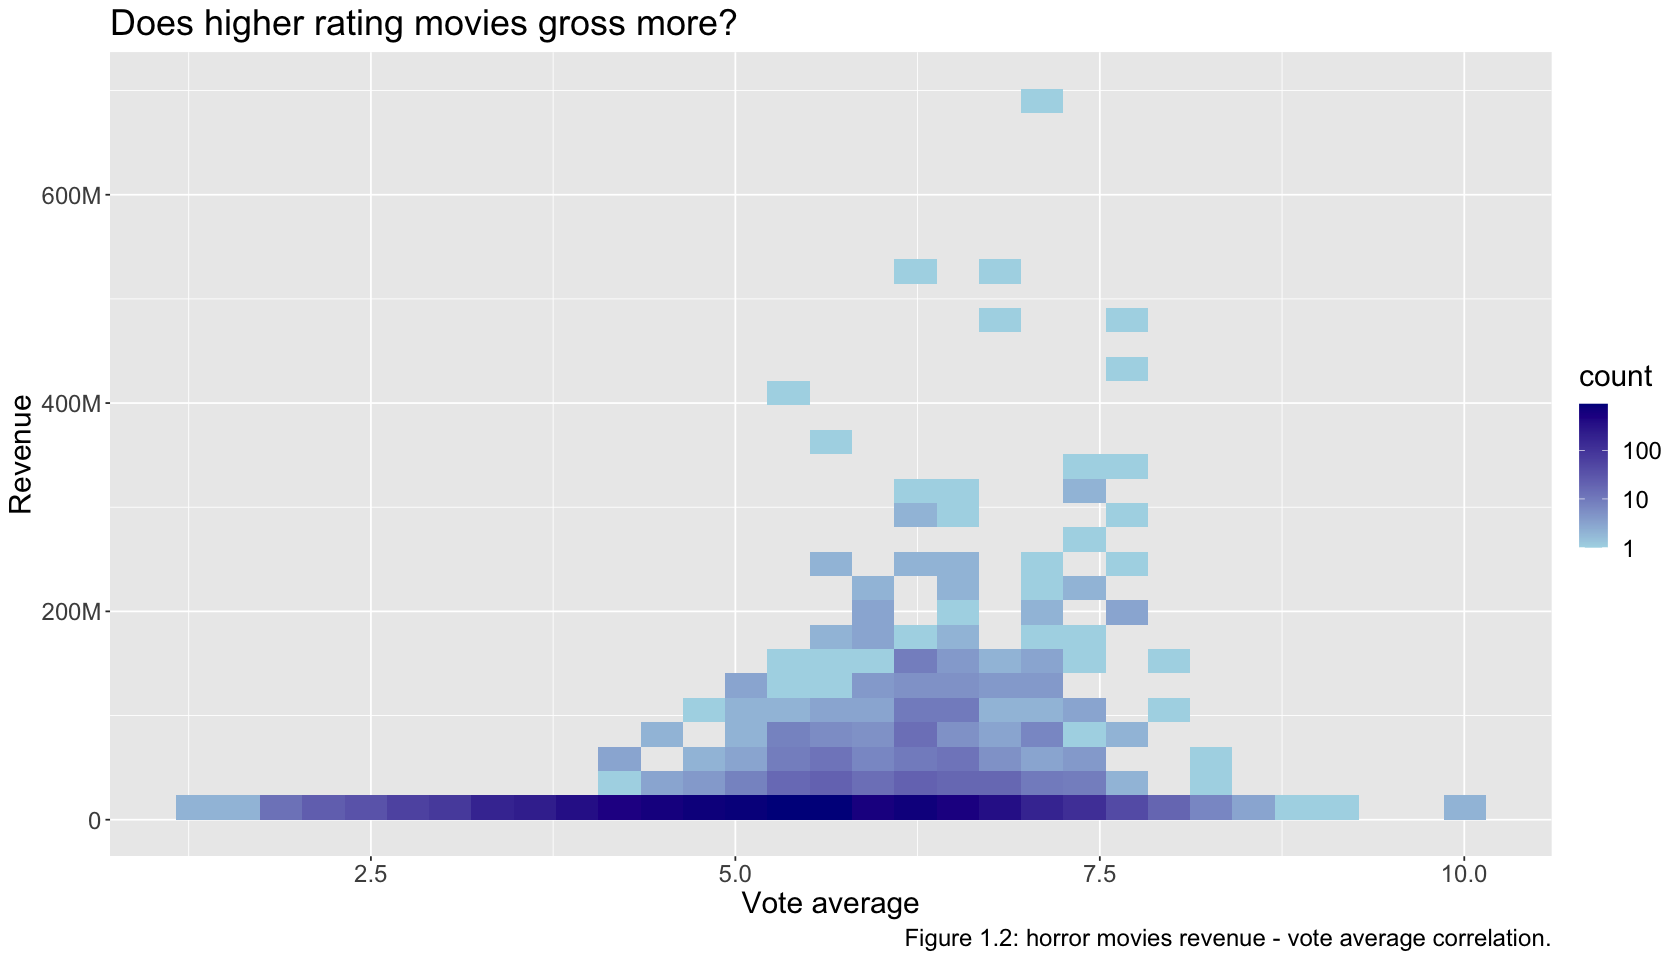

In [7]:
options(repr.plot.width = 14, repr.plot.height = 8)
horror_scatter_bud <- horror_movies |>
    select(budget, revenue, vote_average) |>
    drop_na() |> 
    ggplot(aes(x = vote_average, y = revenue)) +
    geom_bin2d() +
    scale_fill_gradient(low="lightblue" ,high="darkblue", trans="log10") +
        ggtitle('Does higher rating movies gross more?') +
        labs(x = 'Vote average',
             y = 'Revenue',
             caption = "Figure 1.2: horror movies revenue - vote average correlation.") +
        theme(text =  element_text(size = 18)) +
        scale_size(range = c(0, 10)) +
        scale_y_continuous(labels = scales::label_number_si()) +
        scale_x_continuous(labels = scales::label_number_si())
        

horror_scatter_bud

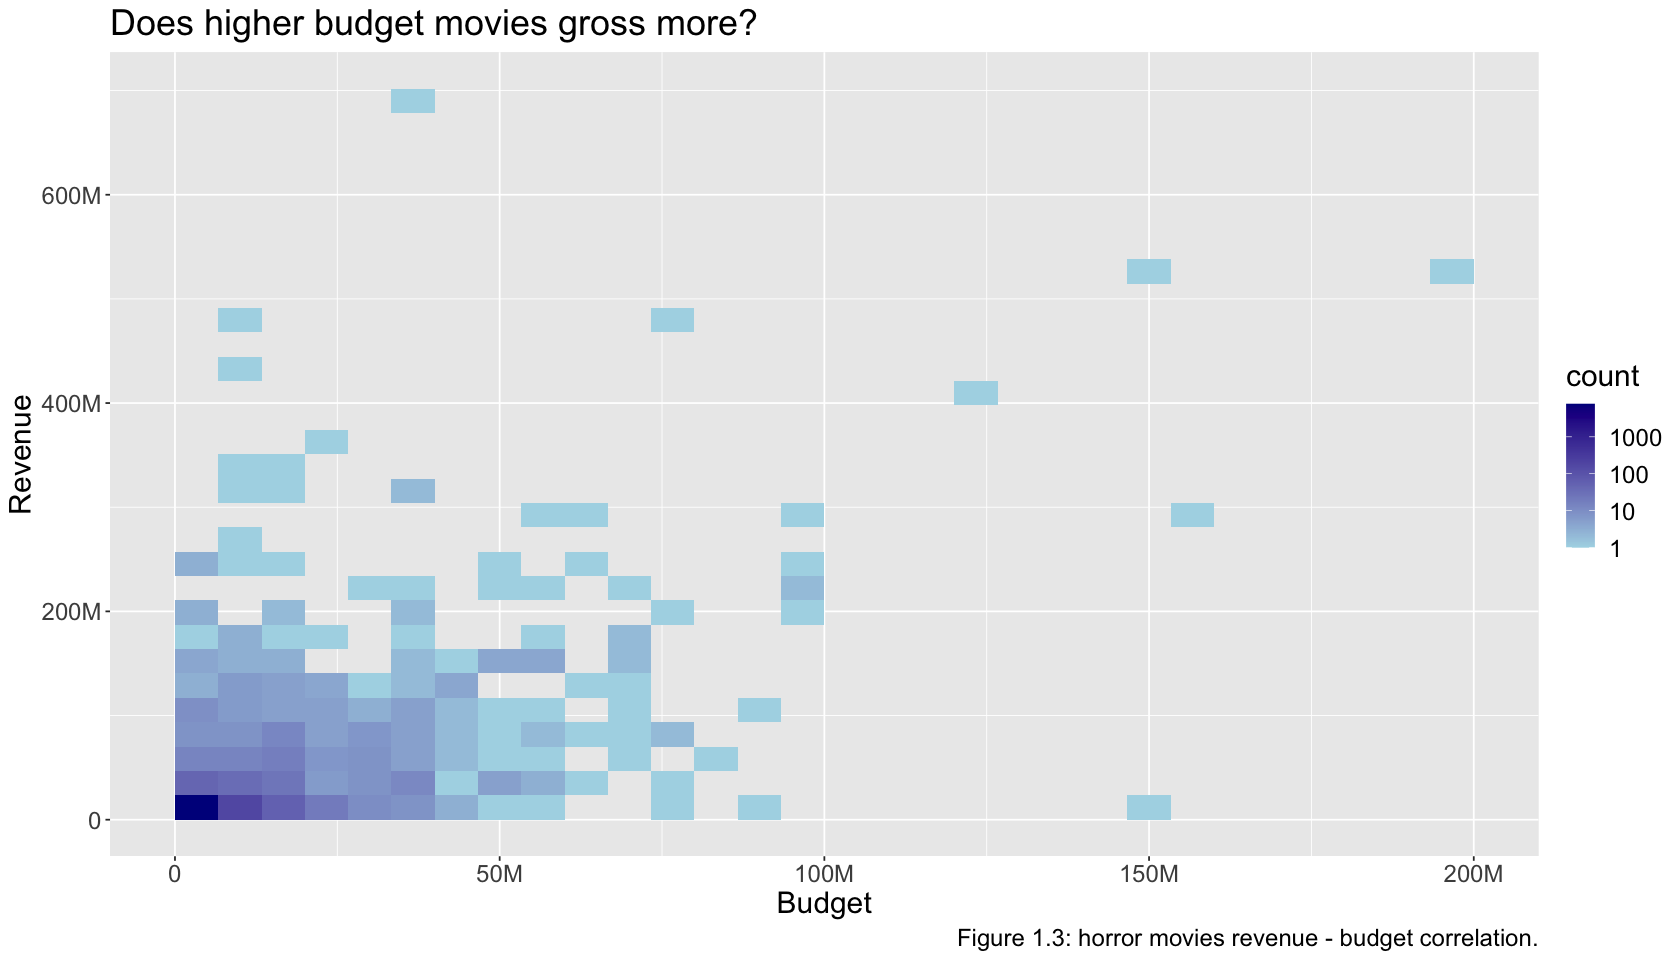

In [8]:
options(repr.plot.width = 14, repr.plot.height = 8)
horror_scatter_vote <- horror_movies |>
    select(budget, revenue, vote_average) |>
    drop_na() |> 
    ggplot(aes(x = budget, y = revenue, size = vote_average)) +
        geom_bin2d() +
        scale_fill_gradient(low="lightblue" ,high="darkblue", trans="log10") +
        ggtitle('Does higher budget movies gross more?') +
        labs(x = 'Budget', y = 'Revenue', 
            caption = "Figure 1.3: horror movies revenue - budget correlation.") +
        theme(text =  element_text(size = 18)) +
        scale_size(range = c(0, 10)) +
        scale_y_continuous(labels = scales::label_number_si()) +
        scale_x_continuous(labels = scales::label_number_si())
        

horror_scatter_vote

From Figure 1.2 we can see that, although there are many movies with low earnings, those with higher ratings show a tendency to have higher revenue. As for the budget (Figure 1.3), it can be seen that there is also a correlation, but there are many cases in which low-budget have high revenue.

### Distributions

In this section we observe the distributions of the attributes of interest. 

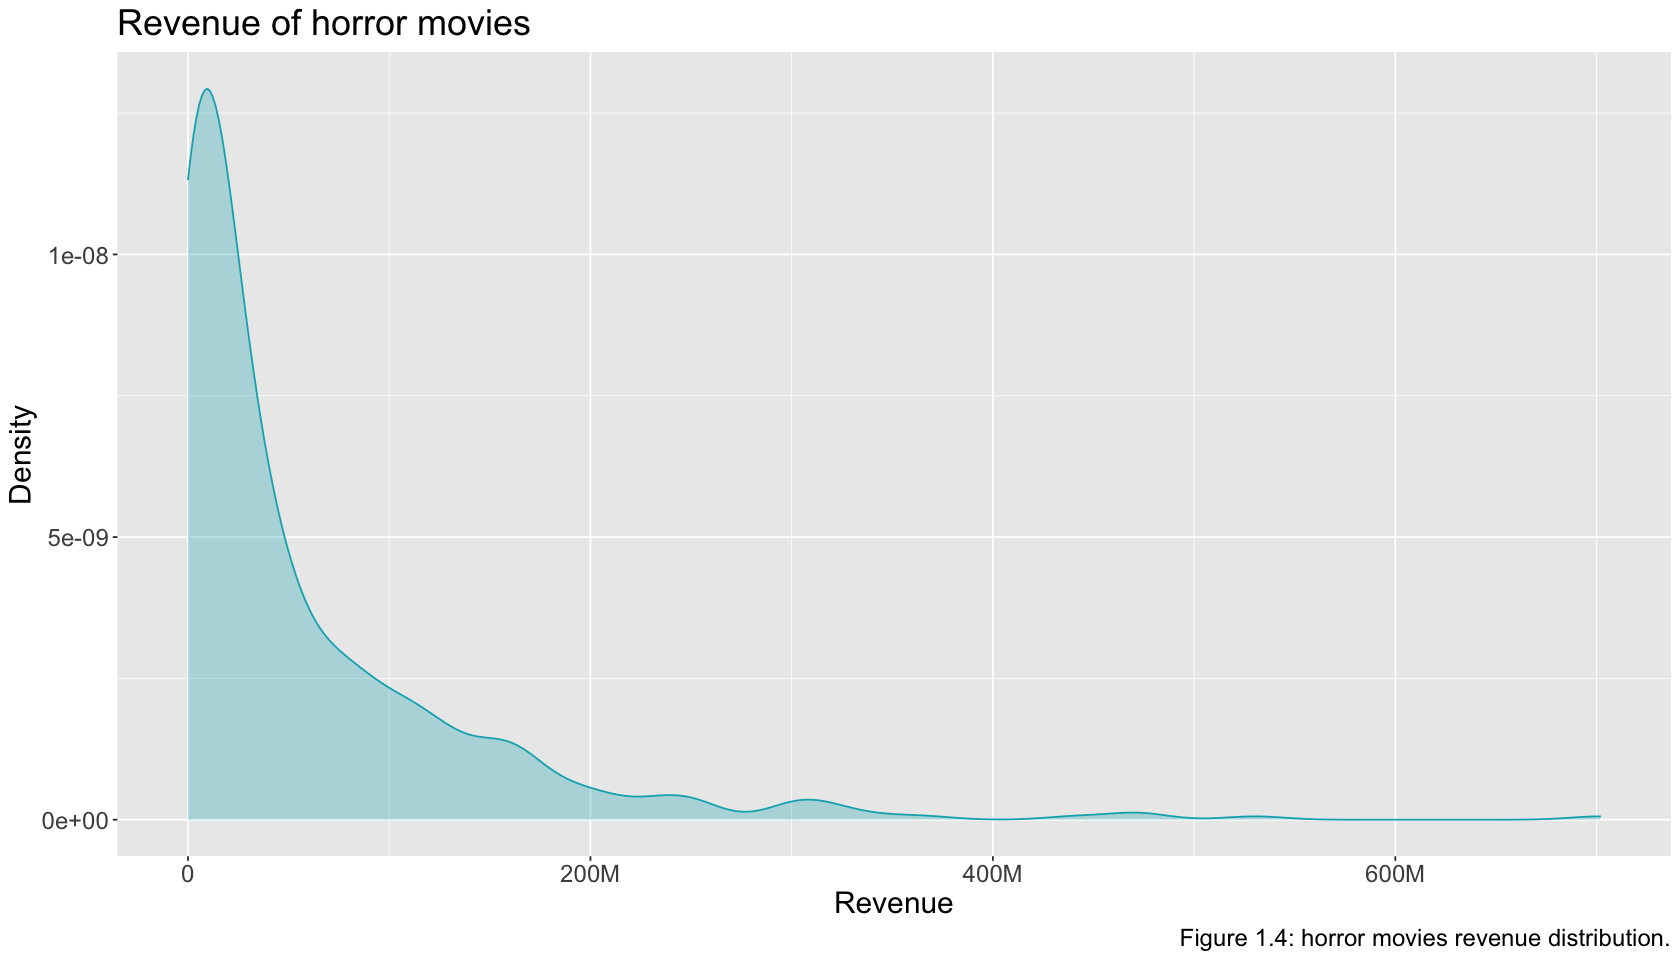

In [21]:
options(repr.plot.width = 14, repr.plot.height = 8)
revenue_density <- horror_movies |> 
    filter(revenue>0) |> 
    drop_na() |> 
    ggplot(aes(x = revenue)) + 
    geom_density(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB") + 
    ggtitle('Revenue of horror movies') +
    scale_x_continuous(labels = scales::label_number_si()) +
    theme(text =  element_text(size = 18)) +
    labs(x = 'Revenue', 
         y = 'Density',
         caption = "Figure 1.4: horror movies revenue distribution.")
    

# Show the plot
revenue_density

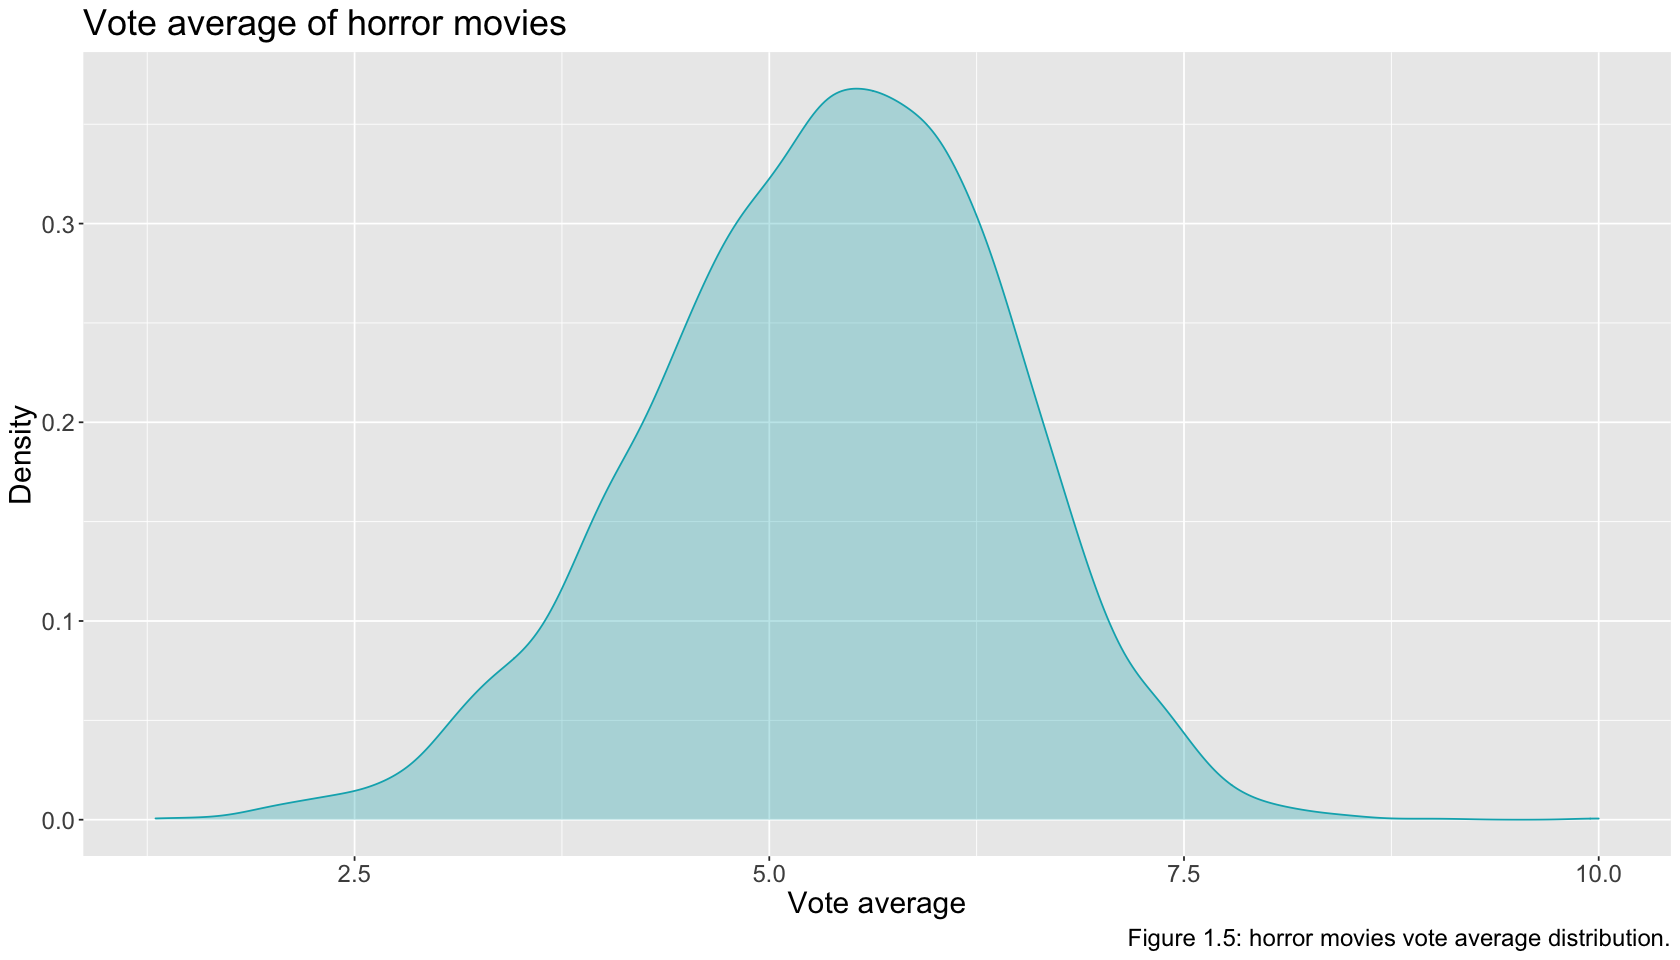

In [22]:
options(repr.plot.width = 14, repr.plot.height = 8)
vote_avg_hist <- horror_movies |>
    filter(vote_average>0)|>
    ggplot(aes(x = vote_average)) +
    geom_density(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB") + 
    ggtitle('Vote average of horror movies') +
    theme(text =  element_text(size = 18)) +
    labs(x = 'Vote average',
         y = 'Density', 
         caption = "Figure 1.5: horror movies vote average distribution.")

# Show the plo6
vote_avg_hist

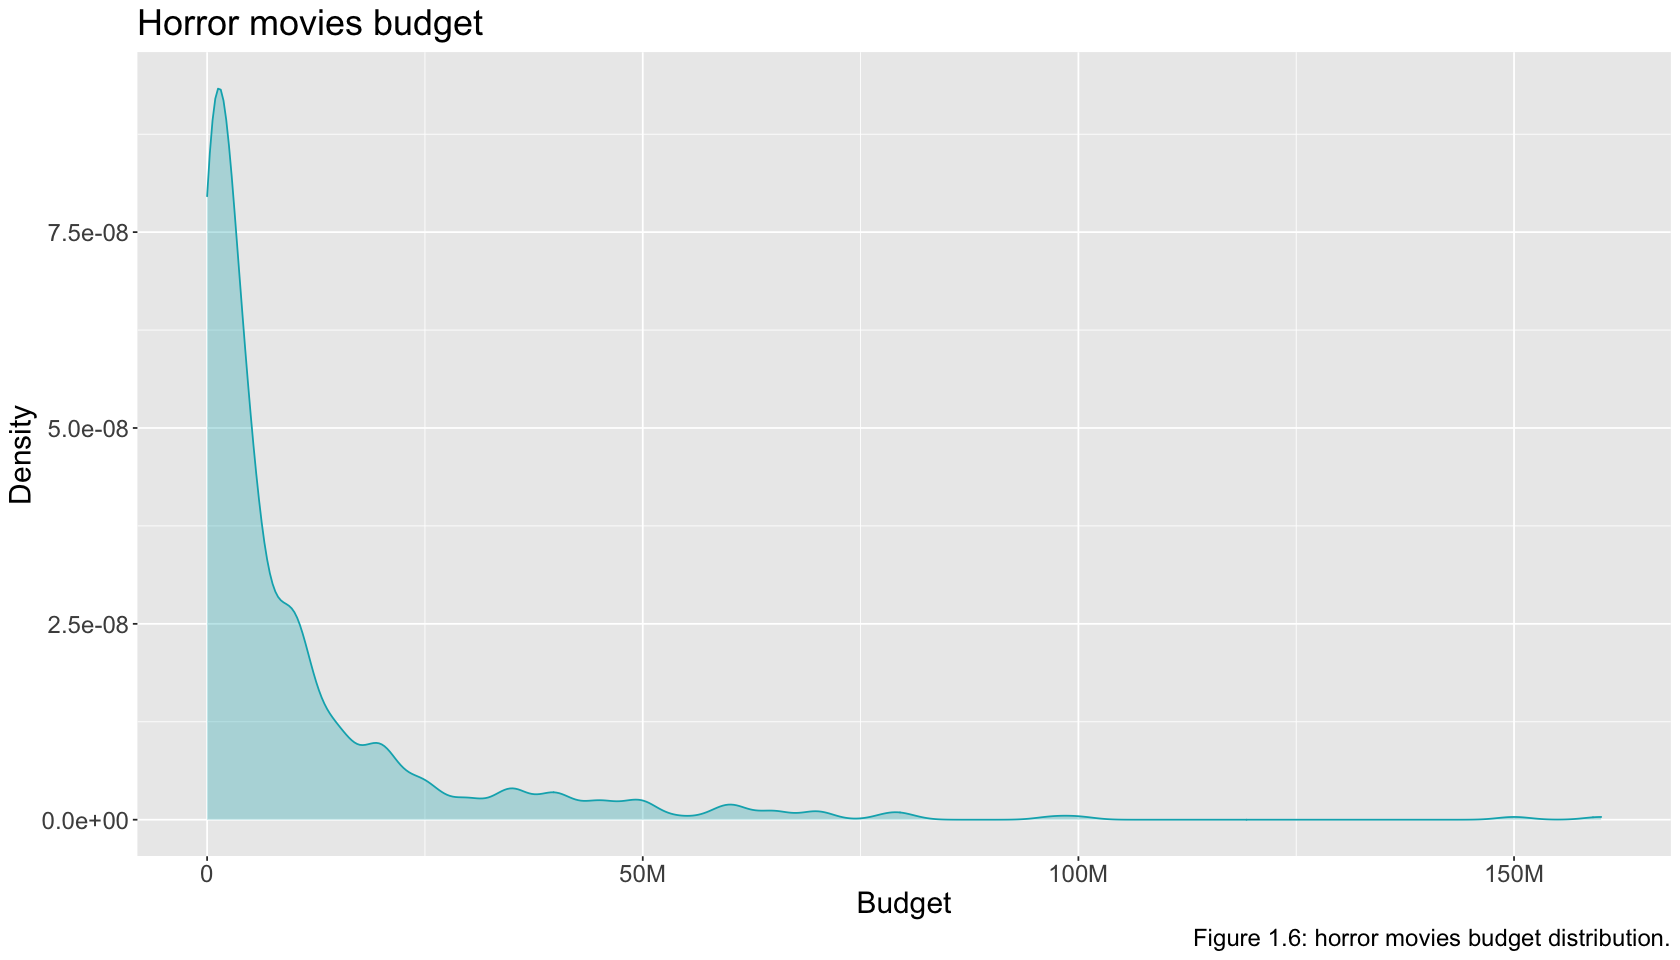

In [24]:
options(repr.plot.width = 14, repr.plot.height = 8)
budget_density <- horror_movies |> 
    filter(budget>0) |> 
    drop_na() |> 
    ggplot(aes(x = budget)) + 
    geom_density(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB") + 
    ggtitle('Horror movies budget') +
    scale_x_continuous(labels = scales::label_number_si()) +
    theme(text =  element_text(size = 18)) +
    labs(x = 'Budget', 
         y = 'Density',
         caption = "Figure 1.6: horror movies budget distribution.")
    

# Show the plot
budget_density

## Summary

Most films have a revenue of less than 100 million dollars, although there are films with a revenue of over 200 million. The distribution of vote average shows that most movies have a vote average between 5 and 6, whereas the budget for this movies is often less than 25 Millions. From our exploratory analysis we conclude that the vote average and budget attributes are correlated with horror movies the box office. Since most horror movies are low budget, we think it is more interesting to explore the relationship between the vote average and revenue.

## References

- The original dataset can be found [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-11-01/horror_movies.csv). The original purpose (by the autor) was is to explore horror movies dating back to the 1950s. Data set was extracted from The Movie Datbase via the tmdb API using R httr. There are ~35K movie records in this dataset.
- [ggplot Doc](https://ggplot2.tidyverse.org/)
- [EDA Analysis Reference from DSCI 531](https://pages.github.ubc.ca/mds-2022-23/DSCI_531_viz-1_students/lectures/4-eda.html)